Задача №1

Тест на Гетероск для OLS :  (26.12420812642011, 8.983017238943363e-06, 16.777294482744804, 1.6753464609689465e-07)
Тест на Гетероск для OLS (White):  (48.85489538486539, 6.778199696813047e-08, 218.6536806665486, 4.228765937108497e-31)


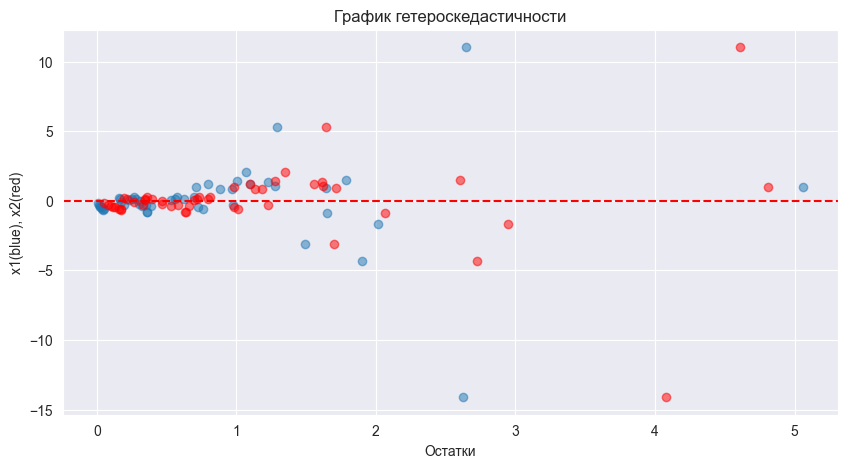

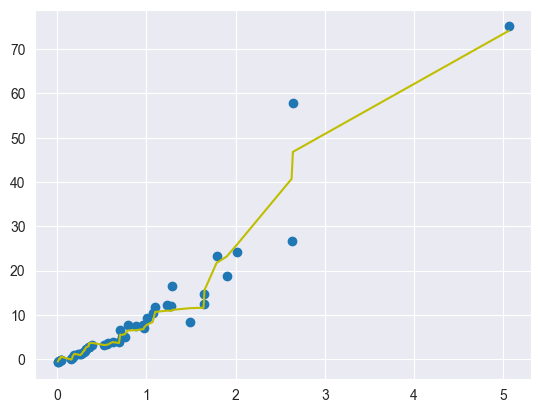

Тест на Гетероск для WLS :  (37.62365856857283, 3.3955606976350225e-08, 46.612813750155695, 5.4300500134665465e-14)
Тест на Гетероск для WLS (White):  (49.8417463746047, 4.383130303444173e-08, 1614.111206184382, 1.0751395928768736e-48)


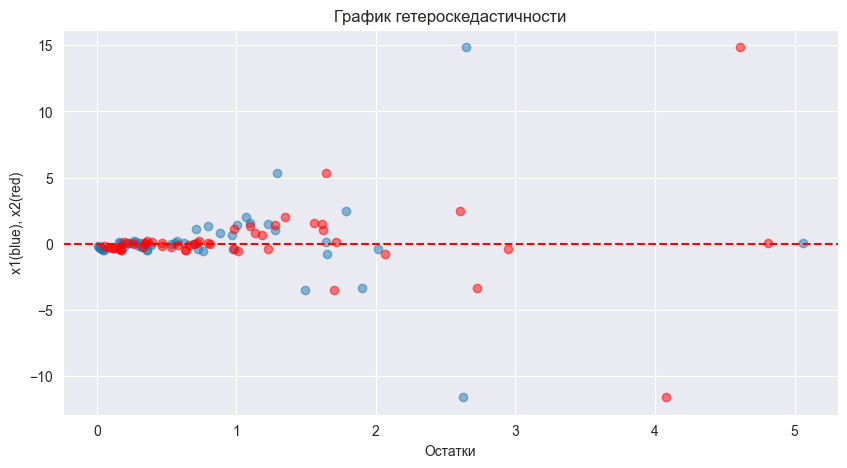

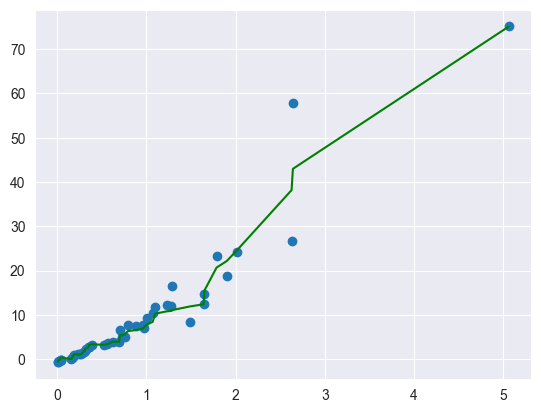

# ---------------------------------------------------------------------------------------------
 # ----------------------------------- OLS_new --------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
Тест на Гетероск для OLS_new :  (2.948603308006886, 0.3996176074533252, 0.960904894819686, 0.41924458599539893)
Тест на Гетероск для OLS_new (White):  (4.203194829184776, 0.8383408158793823, 0.47036847699803236, 0.8698190921815948)


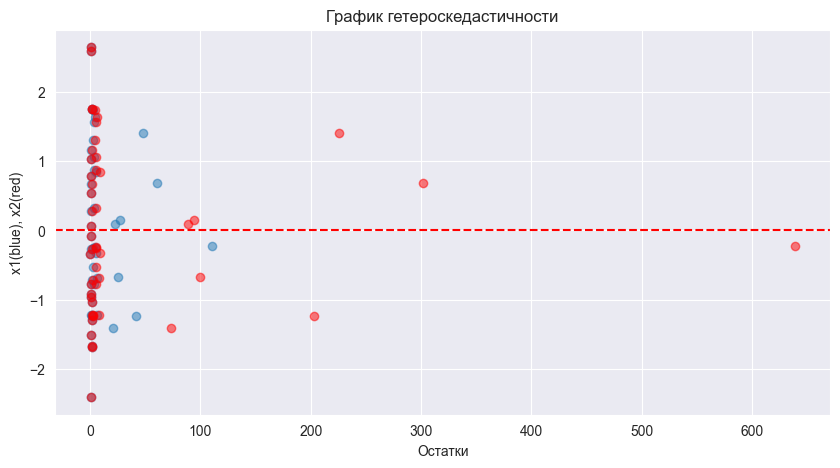

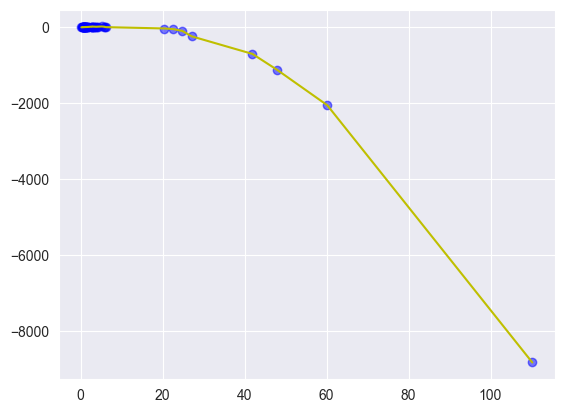

Тест на Гетероск для WLS_new :  (2.948860463676489, 0.39957727869791726, 0.9609939501705975, 0.41920310829231033)
Тест на Гетероск для WLS_new (White):  (4.191461136004393, 0.8394490811258465, 0.4689352434007939, 0.8707945768298715)


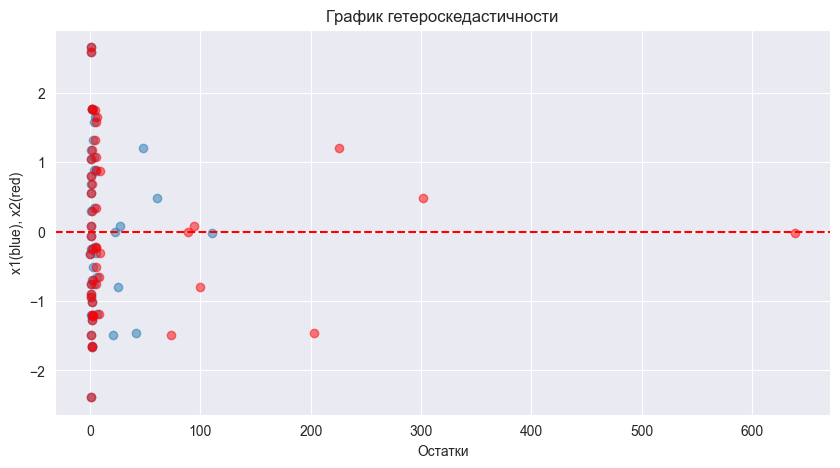

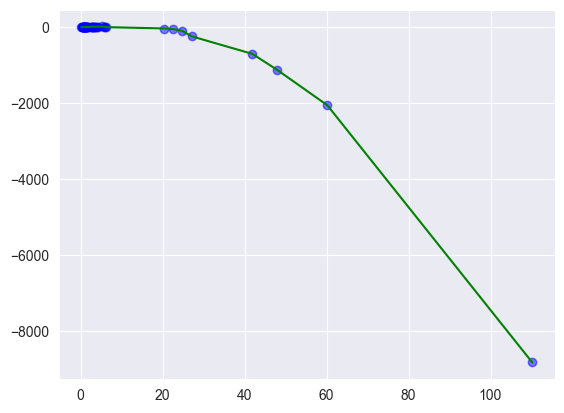

In [13]:
import pc
import statsmodels.api as sm
import statsmodels.stats.api as ssa
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv

X0 = np.ones(50)
X1 = np.random.exponential(1, 50)
X1.sort()
X2 = np.random.exponential(1, 50)
X2.sort()
X1_2 = X1**2
delta = np.random.normal(0,1,size=X1.shape)
eps =delta*X1_2

Y = - X0 + X1 +2*X1_2 + 5*X2 + eps


# ---------------------------------------------------------------------------------------------
# ----------------------------------- OLS ---------------------------------------------------  
# ---------------------------------------------------------------------------------------------


Xmat =  sm.add_constant(np.column_stack((X0, X1, X1_2, X2)))
model = sm.OLS(Y, Xmat).fit()

test01 = ssa.het_breuschpagan(model.resid**2, Xmat)
print("Тест на Гетероск для OLS : ",test01)

test02 = ssa.het_white(model.resid**2, Xmat)
print("Тест на Гетероск для OLS (White): ",test02)

b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X1, model.resid, alpha=0.5)
plt.scatter(X2, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.show()
Yplt = b[0] + b[1]*X1 + b[2]*X1_2 + b[3]*X2

plt.scatter(X1, Y)
plt.plot(X1, Yplt, color='y')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- WLS ---------------------------------------------------  
# ---------------------------------------------------------------------------------------------

weight = 1/(model.resid**2)
model_W = sm.WLS(Y, Xmat, weights= weight).fit()

test01 = ssa.het_breuschpagan(model_W.resid**2, Xmat)
print("Тест на Гетероск для WLS : ",test01)
test02 = ssa.het_white(model_W.resid**2, Xmat)
print("Тест на Гетероск для WLS (White): ",test02)

b = model_W.params
plt.figure(figsize=(10, 5))
plt.scatter(X1, model_W.resid, alpha=0.5)
plt.scatter(X2, model_W.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.show()
Yplt = b[0] + b[1]*X1 + b[2]*X1_2 + b[3]*X2

plt.scatter(X1, Y)
plt.plot(X1, Yplt, color='g')
plt.show()

print("# ---------------------------------------------------------------------------------------------\n # ----------------------------------- OLS_new --------------------------------------------------- \n# ---------------------------------------------------------------------------------------------")
Ynew = Y/X1_2
X1_2new = 1/X1_2
X1new = 1/X1
X2new = X2/X1_2

Xmat_new =  sm.add_constant(np.column_stack((X0, X1new, X1_2new, X2new)))
model_OLS_new = sm.OLS(Ynew, Xmat_new).fit()

test01 = ssa.het_breuschpagan(model_OLS_new.resid**2, Xmat_new)
print("Тест на Гетероск для OLS_new : ",test01)
test02 = ssa.het_white(model_OLS_new.resid**2, Xmat_new)
print("Тест на Гетероск для OLS_new (White): ",test02)

b = model_OLS_new.params
plt.figure(figsize=(10, 5))
plt.scatter(X1new, model_OLS_new.resid, alpha=0.5)
plt.scatter(X2new, model_OLS_new.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.show()
Yplt = b[0] + b[1]*X1new + b[2]*X1_2new + b[3]*X2new

plt.scatter(X1new , Ynew, color = 'b', alpha=0.5)
plt.plot(X1new, Yplt, color='y')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- WLS_new ------------------------------------------------- 
# ---------------------------------------------------------------------------------------------

weight = 1/(model_OLS_new.resid**2)
model_WLS_new = sm.WLS(Ynew, Xmat_new, weights= weight).fit()

test01 = ssa.het_breuschpagan(model_WLS_new.resid**2, Xmat_new)
print("Тест на Гетероск для WLS_new : ",test01)
test02 = ssa.het_white(model_WLS_new.resid**2, Xmat_new)
print("Тест на Гетероск для WLS_new (White): ",test02)

b = model_WLS_new.params
plt.figure(figsize=(10, 5))
plt.scatter(X1new, model_WLS_new.resid, alpha=0.5)
plt.scatter(X2new, model_WLS_new.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.show()
Yplt = b[0] + b[1]*X1new + b[2]*X1_2new + b[3]*X2new

plt.scatter(X1new, Ynew, color = 'b', alpha=0.5)
plt.plot(X1new, Yplt, color='g')
plt.show()

Задача №2

[ 1.46257744  0.94070193  1.47718402  1.47284305  2.37698503  1.83456644
  1.03165127  2.49191894  0.60338249  2.21921803  3.5849491   2.82581739
  1.67816899  1.01220185  1.55305262  3.19781405  2.89652523  3.12267435
  2.25215219  2.95502703  1.87339904  1.15545996  1.73528212  1.50935232
  2.38179954  1.0661996   3.00255061  5.00488658  4.20937801  3.14276851
  1.71507361  3.2235276   5.50954008  4.41449346  4.6521849   2.16385986
  4.77410572  2.32709886  3.20891044  3.91788752  1.61934305  4.8999318
  3.39412614  2.96773053  6.0540887   2.84991036  5.62669565  4.89157741
  3.88483239  5.14951487  5.19862007  5.12850557  5.84532164  5.05610718
  6.50381417  4.88020936  6.00441589  4.61505497  6.53685758  5.584947
  5.47062119  5.03902885  7.1021835   7.1660103   9.46942151  7.07356634
  7.90143119  8.20709789  7.0126447   7.61197151  5.56965894  8.82428228
  9.13936124 10.10214081 11.19029363  9.44634119 10.50031005 11.34292863
 11.36733516 11.31266663 11.03987712 13.07092815 14.30

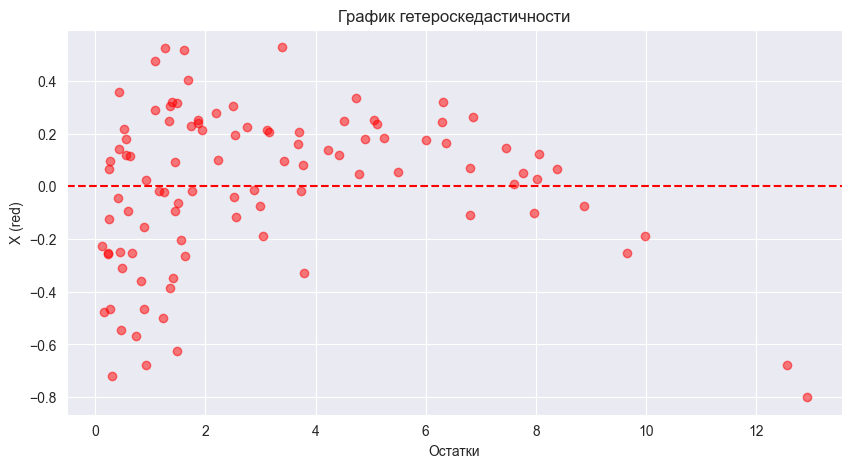

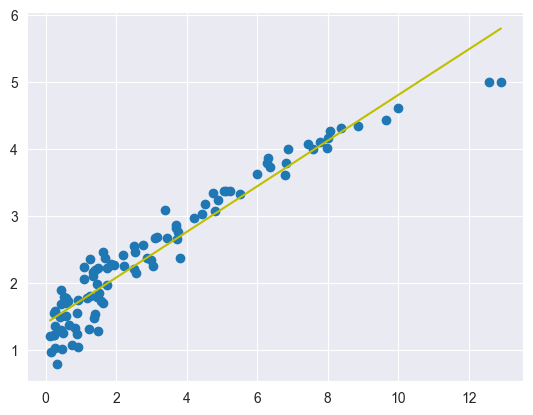

Тест на Гетероск для OLS :  (0.4960487059503804, 0.48124145073758673, 0.48855118365580574, 0.48622984606778885)
Тест на Гетероск для OLS (White):  (0.5166517295241535, 0.7723435115610913, 0.2518774178548431, 0.7778468462697015)
Coefficients : [-0.08844992  0.99700445]


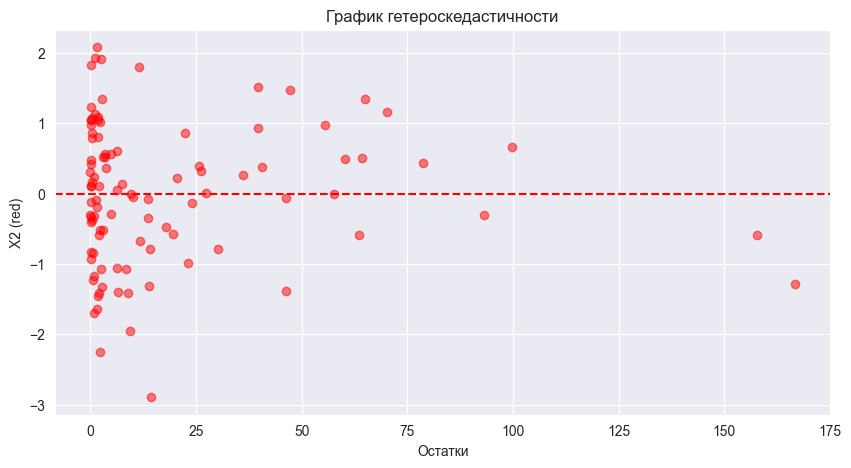

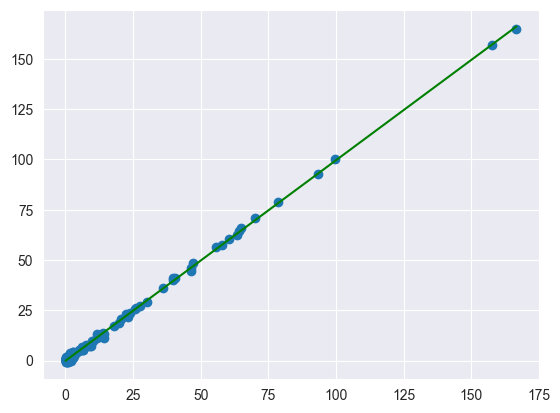

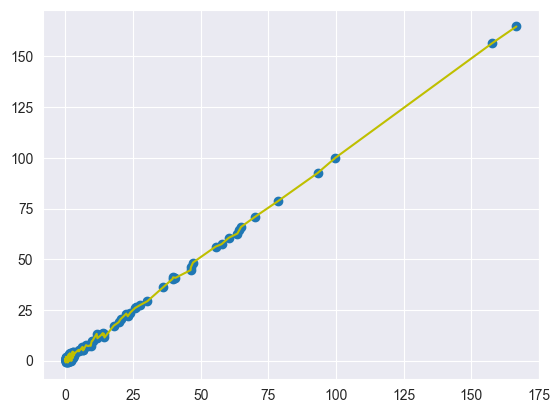

In [41]:


X0 = np.ones(100)
X = np.random.chisquare(3,100)
X.sort()
X2 = X**2
eps = np.random.normal(0,1,size=X.shape)
temp = 2*X + X0 + eps
print(temp, "\n", "\n", np.sqrt(temp), "\n", "\n")

Y = np.sqrt(abs(2*X + X0 + eps))
Y2 = X2 + eps

# ---------------------------------------------------------------------------------------------
# ----------------------------------- X&Y ----------------------------------------------------- 
# ---------------------------------------------------------------------------------------------

Xmat =  sm.add_constant(np.column_stack((X0, X)))
model = sm.OLS(Y, Xmat).fit()

test01 = ssa.het_breuschpagan(model.resid**2, Xmat)
print("Тест на Гетероск для OLS : ",test01)

test02 = ssa.het_white(model.resid**2, Xmat)
print("Тест на Гетероск для OLS (White): ",test02)

b = model.params
print("Coefficients :", b)

plt.figure(figsize=(10, 5))
plt.scatter(X, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X (red)')
plt.show()
Yplt = b[0] + b[1]*X

plt.scatter(X, Y)
plt.plot(X, Yplt, color='y')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- X2&Y2 ----------------------------------------------------- 
# ---------------------------------------------------------------------------------------------

Xmat =  sm.add_constant(np.column_stack((X0, X2)))
model = sm.OLS(Y2, Xmat).fit()

test01 = ssa.het_breuschpagan(model.resid**2, Xmat)
print("Тест на Гетероск для OLS : ",test01)

test02 = ssa.het_white(model.resid**2, Xmat)
print("Тест на Гетероск для OLS (White): ",test02)

b = model.params
print("Coefficients :", b)
plt.figure(figsize=(10, 5))
plt.scatter(X2, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X2 (red)')
plt.show()
Yplt = b[0]+b[1]*X2

plt.scatter(X2, Y2)
plt.plot(X2, Yplt, color='g')
plt.show()

plt.scatter(X2, Y2)
plt.plot(X2, Y2, color='y')
plt.show()
